<a href="https://colab.research.google.com/github/gregor-posadas/Gregor-Projects/blob/main/mod01_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 01: Jupyter Notebook Assignment

## Name:

### Part I: Instructions

In this part of the assignment, your task is to create a one-dimensional random walk model similar to the one in [the example notebook](./mod01-PythonIntro-1.ipynb) with the following parameters:

* `Nt` = 200
* `mu_x` = 1.5
* `s_x` = 2.1
* `min_x` = 1.25

Where `min_x` is a new parameter that is the _minimum step size_ at each step in the random walk. When you calculate the step size at each step, you will only accept values that are larger than `min_x` by using a `while` loop to keep generating step sizes until the step size exceeds `min_x`. Do this for `Nx` = 1,000 random walkers.

___Deliverables:___

1. Code to create the random walk with comments
2. Reproduce the 2 figures in section 5.1 and 5.2 of the example notebook (__Note__: you will have to adjust the `bins` and `range` parameters provided to histogram).

Text(0, 0.5, 'Frequency [-]')

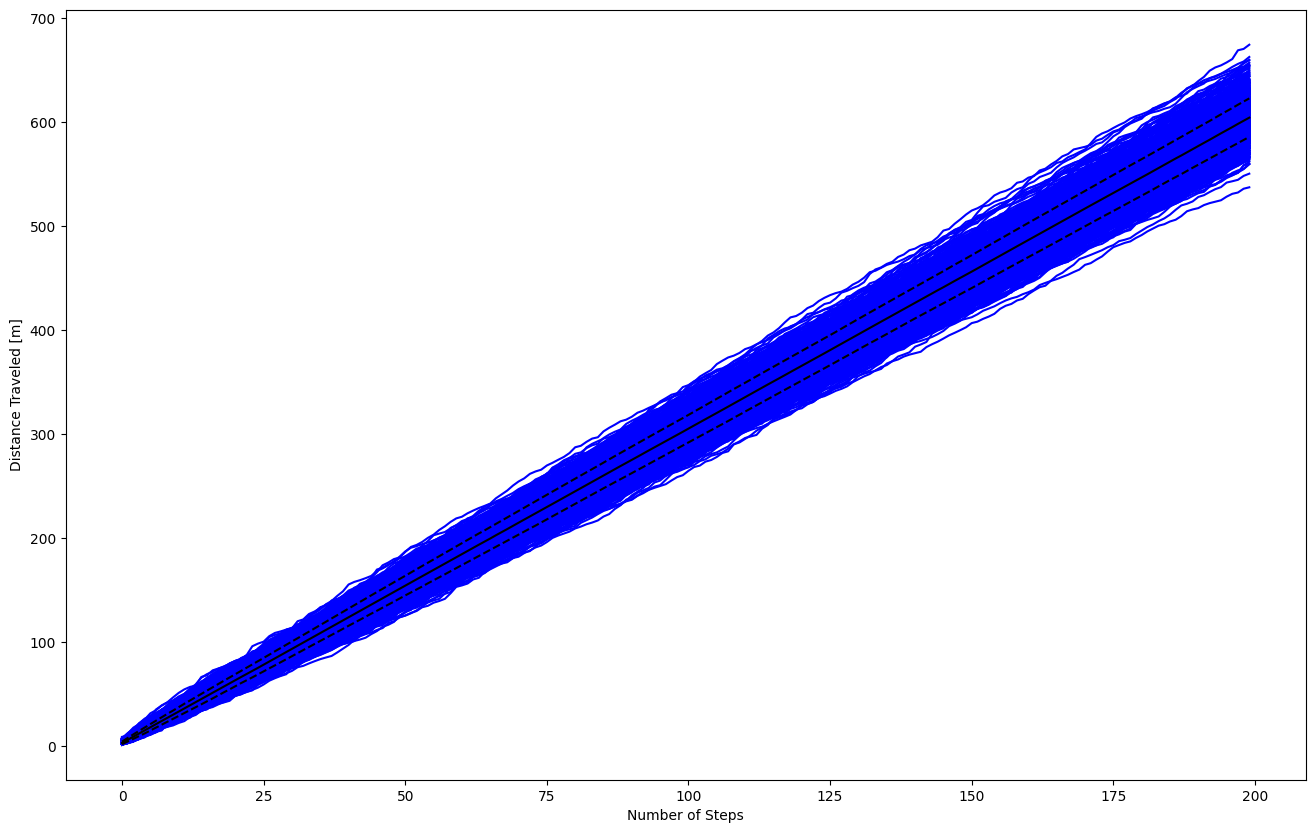

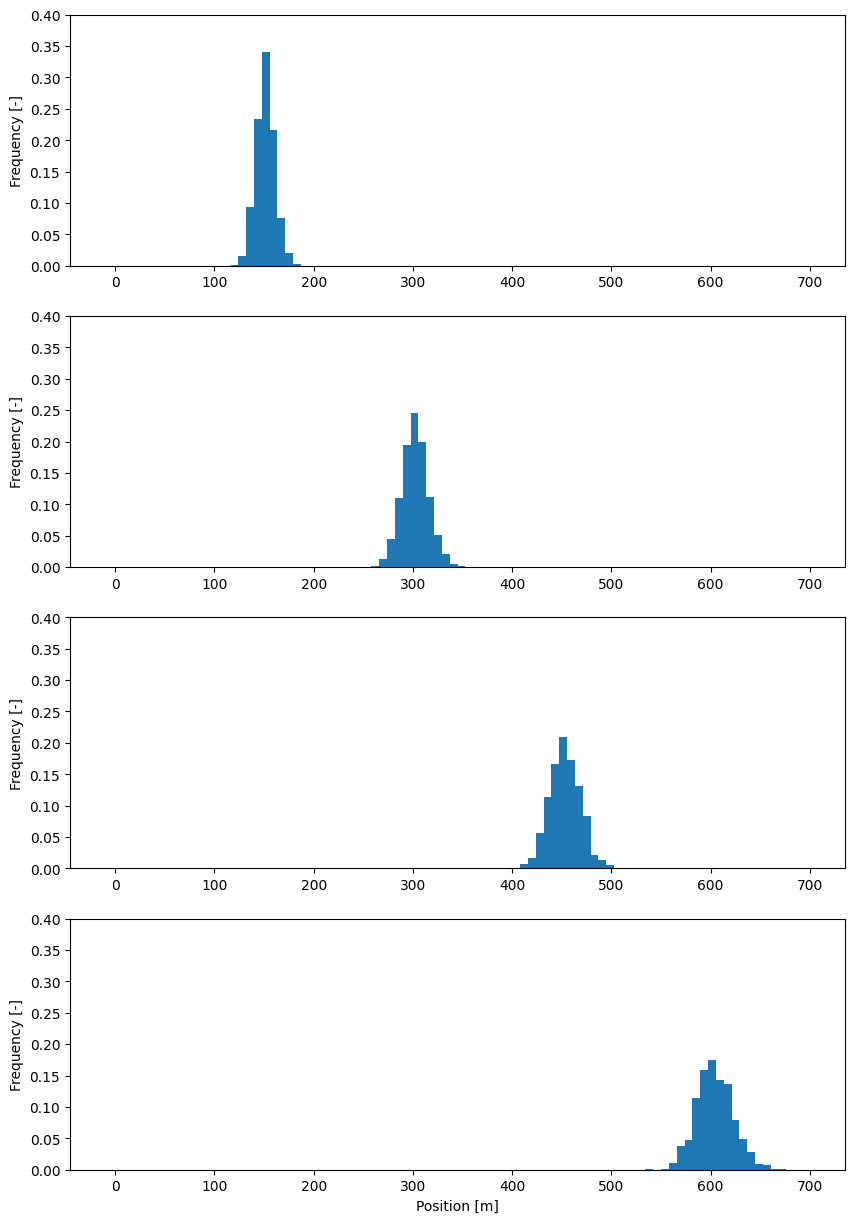

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Nt = 200 # This is the number of steps (or time steps) in our Random Walk
Nx = 1000 # This is the number of random walkers

mu_x = 1.5 # The average step size in our random walk
s_x = 2.1 # The standard deviation of the step size in our random walk
min_x = 1.25 # The minimum step size at each step in the random walk

X = np.zeros((Nt,Nx)) # Our datapoints are plotted in reference to this 2-D array with rows and columns, where Nt is the number of array rows, and Nx is the number of array columns.
# We start with a 200 x 1000 array filled with zeros. The for loop below will take care of replacing each element of the array with the data we want limited to the boundary counditions we set.

for i in np.arange(Nt): # loop for each time step.
     for j in np.arange(Nx): # nested loop that goes through each walker one by one.

        # Calculate the random step size for the j^th walker at the i^th time step

        while True: # This will run the "while loop" forever until it meets the conditions of the subsequent "if statement" where we have implemented the minimum step distance.
            x_i = s_x*np.random.randn() + mu_x # Calculated distance of a single random step
            if x_i >= min_x:
              # If the step size is greater than the minimum step size, move on to determining the total distance traveled by the walker.
              # If it is not greater than or equal to the minimum step size, repeat the "while loop" where the first step is to generate the random step.
              break # Once the conditions set in the while loop's if statement are met, break out of the while loop and continue to determining the distance traveled.

             # Check to see if we're at the first time step
        if(i==0):
              # If at the first time step, the initial position was 0
              X[i,j] = 0.0 + x_i # X is the total distance traveled after the initial position 0
        else:
              # If at a subsequent time step, the initial position was the position at the previous time step
              X[i,j] = X[i-1,j] + x_i # X in this scenario is the total distance traveled if the walker were to start from a point other than 0

mean_X = np.mean(X, axis=1) # Added this line so that mean_X would be defined in the subsequent plt.plot code
std_X = np.std(X,axis=1) # Added this line so that std_X would be defined in the subsequent plt.plot code

plt.figure(figsize=(16,10)) #This is just for the dimensions of the graph

plt.plot(np.arange(Nt),X,'b-') # Plot the point with np.arange(Nt) being the x-coordinate (representing total steps), X being the y-coordinate (representing total distance traveled), and 'b-' being the style of the plot (in this case solids blue line)
plt.plot(np.arange(Nt),mean_X,'k-') # Plots the average position of all walkers as a solid black line
plt.plot(np.arange(Nt),mean_X + std_X, 'k--') # Plots the sum of the mean and standard deviation as a dashed black line
plt.plot(np.arange(Nt),mean_X - std_X, 'k--') # Plots the difference of the mean and standard deviation as a dashed black line
plt.xlabel('Number of Steps') # Label the x axis with 'Number of Steps'
plt.ylabel('Distance Traveled [m]') # Label the y axis with 'Distance Traveled [m]'

# The following lines of code are to create the histogram.
# Bins have been changed to 90 and ranges have been changed to 700 to accommodate the higher distance traveled at 700m
# Note that this does not plot the histograms yet.
x_50, be_50 = np.histogram(X[49,:], bins=90, range=(-10.0,700)) # np.histogram outputs two values (counts and bin edges). x_50 and be_50 will receive the two different outputs respectively.
x_100, be_100 = np.histogram(X[99,:], bins=90, range=(-10.0,700))
x_150, be_150 = np.histogram(X[149,:], bins=90, range=(-10.0,700))
x_200, be_200 = np.histogram(X[-1,:], bins=90, range=(-10.0,700))

# The following lines of code configure the plot for the histogram corresponding to time step 50
plt.figure(figsize=(10,15))
plt.subplot(4,1,1) #This plots the histogram as a subplot of larger plot. (4,1,1) means that the plot is divided into 4 sections, with 1 column, and this specific subplot is to be placed in position 1 (topmost). The same pattern will be applied to the next three histogram subplots.
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width=(be_50[1]-be_50[0])) #This plots the actual bars. "be_50[1:]+be_50[:-1])/2" determines the center of each bin.
plt.ylim((0.0,0.4)) # Sets the limit for the y-axis.
plt.ylabel('Frequency [-]') # Labels the y-axis.

# The following lines of code configure the plot for the histogram corresponding to time step 100
plt.subplot(4,1,2)
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

# The following lines of code configure the plot for the histogram corresponding to time step 150
plt.subplot(4,1,3)
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0]))
plt.ylim((0.0,0.4))
plt.ylabel('Frequency [-]')

# The following lines of code configure the plot for the histogram corresponding to time step 200
plt.subplot(4,1,4)
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_200)), width=(be_200[1]-be_200[0]))
plt.ylim((0.0,0.4))
plt.xlabel('Position [m]')
plt.ylabel('Frequency [-]')

### Part II: Instructions

In this part of the assignment, your task is to create a __two-dimensional__ random walk model. The 2-D random walk is just an extension of the 1-D random walk into a second dimension. Assume that at each step in the random walk, the step size in the x- and y-directions are _independent_ of one another. That is, you do not need to know anything about the step size in the x-direction to calculate the step size in the y-direction and vice versa. Use the following parameters:

* Nt = 300
* Nx = 3
* mu_x = 0.5
* s_x = 1.5
* mu_y = 5.0
* s_y = 2.5

Where `mu_y` and `s_y` are, respectively, the average and standard deviation of the step size in the y-direction.

___Deliverables___

1. Code to create the random walk with comments
2. Plot the position of all three random walkers at each step of their respective random walks on the ___same plot___.

Text(0, 0.5, 'Distance traveled in y-direction [m]')

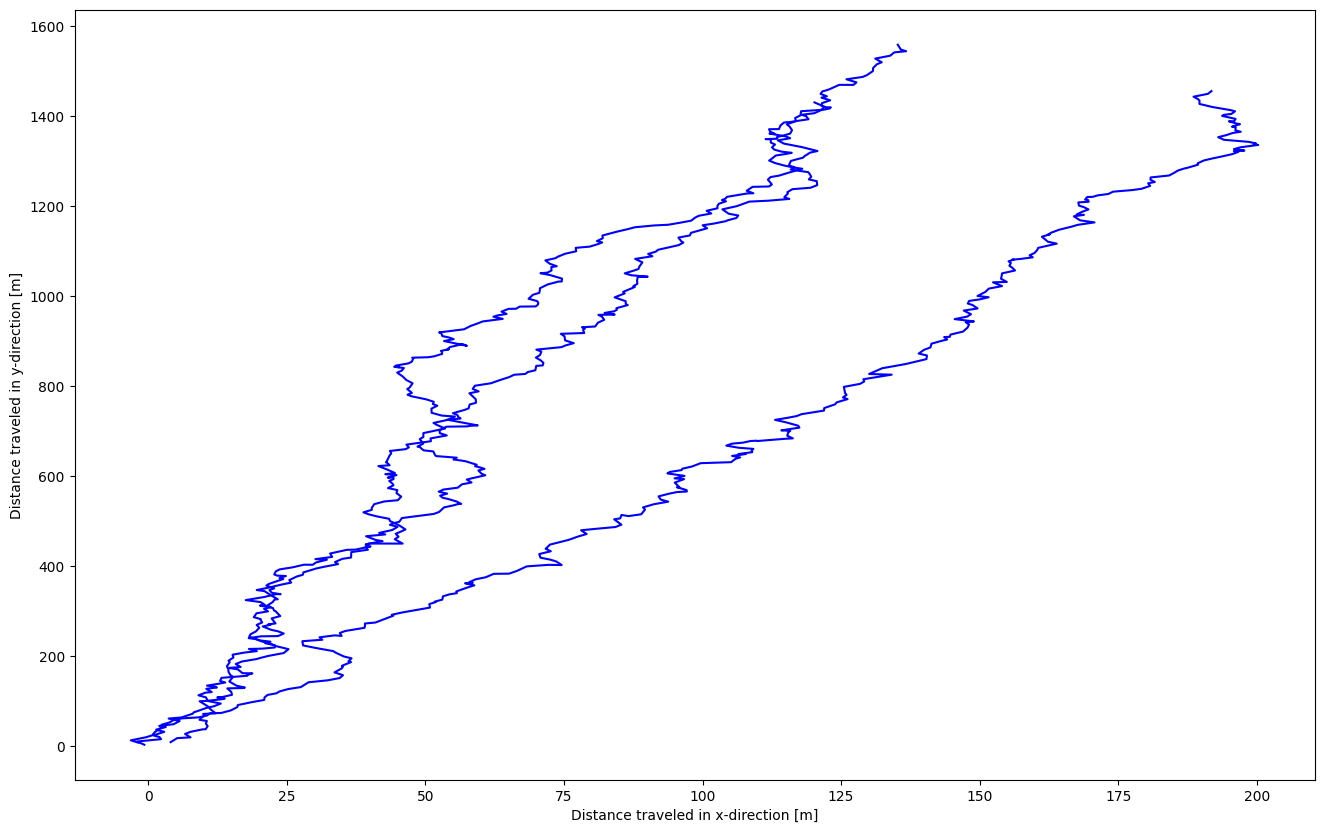

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Nt = 300 # Number of steps
Nx = 3 # Number of walkers

mu_x = 0.5 # Average step size in the x-direction
s_x = 1.5 # Step size standard deviation in the x-direction
mu_y = 5.0 # Average step size in the y-direction
s_y = 2.5 # Step size standard deviation in the y-direction

X = np.zeros((Nt,Nx)) # Our datapoints are plotted in reference to this 2-D array, where Nt is the number of array rows, and Nx is the number of array columns.
# We start with a 300 x 3 array filled with zeros. The for loop below will take care of replacing each element of the array with the data we want limited to the boundary counditions we set.
Y = np.zeros((Nt,Nx))

for i in np.arange(Nt): # loop for each time step.
     for j in np.arange(Nx): # nested loop that goes through each walker one by one.

        # Calculate the random step size for the j^th walker at the i^th time step in the x and y direction respectively
        # Biggest change for the next lines of code is that the y-position must now be taken into consideration for this 2-d random walk.
        x_i = s_x*np.random.randn() + mu_x
        y_i = s_y*np.random.randn() + mu_y

        if(i==0):
              # If at the first time step, the initial position was 0
              X[i,j] = 0.0 + x_i # X is the total distance traveled after the initial position 0 in the x-direction
              Y[i,j] = 0.0 + y_i # Y is the total distance traveled after the initial position 0 in the y-direction
        else:
              # If at a subsequent time step, the initial position was the position at the previous time step
              X[i,j] = X[i-1,j] + x_i # X in this scenario is the total distance traveled in the x-direction if the walker were to start from a point other than 0
              Y[i,j] = Y[i-1,j] + y_i # Y in this scenario is the total distance traveled in the y-direction if the walker were to start from a point other than 0

mean_X = np.mean(X, axis=1) # Added this line so that mean_X would be defined in the subsequent plt.plot code
std_X = np.std(X,axis=1) # Added this line so that std_X would be defined in the subsequent plt.plot code

plt.figure(figsize=(16,10)) # Create a new figure and make it 16" wide by 10" tall

plt.plot(X,Y,'b-') # Plot the location of all walkers versus time as blue lines
plt.xlabel('Distance traveled in x-direction [m]') # Label the x-axis
plt.ylabel('Distance traveled in y-direction [m]') # Label the y-axis